In [4]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings("ignore")

data = tf.keras.datasets.fashion_mnist.load_data()
data

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [8]:
def load_and_preprocess_data():
    # Load Fashion MNIST dataset
    (trainX,trainY),(testX,testY)=tf.keras.datasets.fashion_mnist.load_data()
    # Reshape the data
    trainX = trainX.reshape(-1, 28, 28, 1)
    testX = testX.reshape(-1, 28, 28, 1)
    # Convert labels to categorical
    trainY_cat = tf.keras.utils.to_categorical(trainY)
    testY_cat = tf.keras.utils.to_categorical(testY)

    # Normalize the pixel values
    train_norm, test_norm = trainX / 255.0, testX / 255.0

    return train_norm, trainY_cat, test_norm, testY_cat

    

In [26]:
def create_cnn_model():
    model=tf.keras.models.Sequential(
        [
            tf.keras.layers.Conv2D(64,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'),
            tf.keras.layers.AvgPool2D(pool_size=(2,2)),
            tf.keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'),
            tf.keras.layers.AvgPool2D(pool_size=(2,2)),
            tf.keras.layers.GlobalAveragePooling2D(),
            tf.keras.layers.Dense(10,activation='softmax')
        ]
    )

    model.compile(loss='categorical_crossentropy',optimizer='adam')
    return model

In [24]:
def train_model(model,trainX,trainY_cat,testX,testY_cat,epochs=10):
    history=model.fit(trainX,trainY_cat,epochs=epochs,validation_data=(testX,testY_cat))
    return history

In [22]:
def visualize_random_predictions(model, testX, testY_cat, class_names):
    images=[]  #empty list to store the images.
    labels=[]  #empty list to store the true labels.
    random_indices = random.sample(range(len(testX)),10)
    # enerates a list of 10 unique random indices from the test set. These indices will be used to select random images for visualization.
    
    for idx in random_indices:
        # Append the image and its true label to the lists
        images.append(testX[idx])
        labels.append(testY_cat[idx])
    #Converts the lists of images and labels into NumPy arrays for easier manipulation.
    images=np.array(images)
    labels=np.array(labels)
     # Create a new figure with a size of 20x8 inches
    fig = plt.figure(figsize=(20,8))
    # Define the number of rows and columns for the subplot grid
    rows, cols =2, 5
    x=1
    
    for image, label in zip(images,labels):
        # Add a subplot to the figure at position (rows, cols, x)
        fig.add_subplot(rows,cols,x)
         # Make a prediction on the current image using the model. The image is expanded along the batch dimension using tf.expand_dims to match the model's input shape.
        prediction = model.predict(tf.expand_dims(image,axis=0))
        
         # Extract the predicted label and true label from their one-hot encoded representations
        predicted_label = class_names[tf.argmax(prediction.flatten())]
        true_label = class_names[tf.argmax(label)]
        
          # Set subplot title to display true and predicted labels
        plt.title(f"True Label: {true_label}, Predicted Label: {predicted_label}")
       
       # Plot the image and normalize pixel values to [0, 1]
        plt.imshow(image/255.)
        # Turn off axis for the current subplot
        plt.axis("off")
         # Increment subplot position counter
        x+=1
     
        
        
                        

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - loss: 1.3686 - val_loss: 0.8139
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - loss: 0.7439 - val_loss: 0.6895
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - loss: 0.6593 - val_loss: 0.6214
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - loss: 0.6121 - val_loss: 0.6085
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - loss: 0.5772 - val_loss: 0.5796
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - loss: 0.5519 - val_loss: 0.5441
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - loss: 0.5344 - val_loss: 0.5441
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - loss: 0.5050 - val_loss: 0.5191
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - loss: 0.4914 - val_loss: 0.4886
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - loss: 0.4763 - val_loss: 0.4809
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━

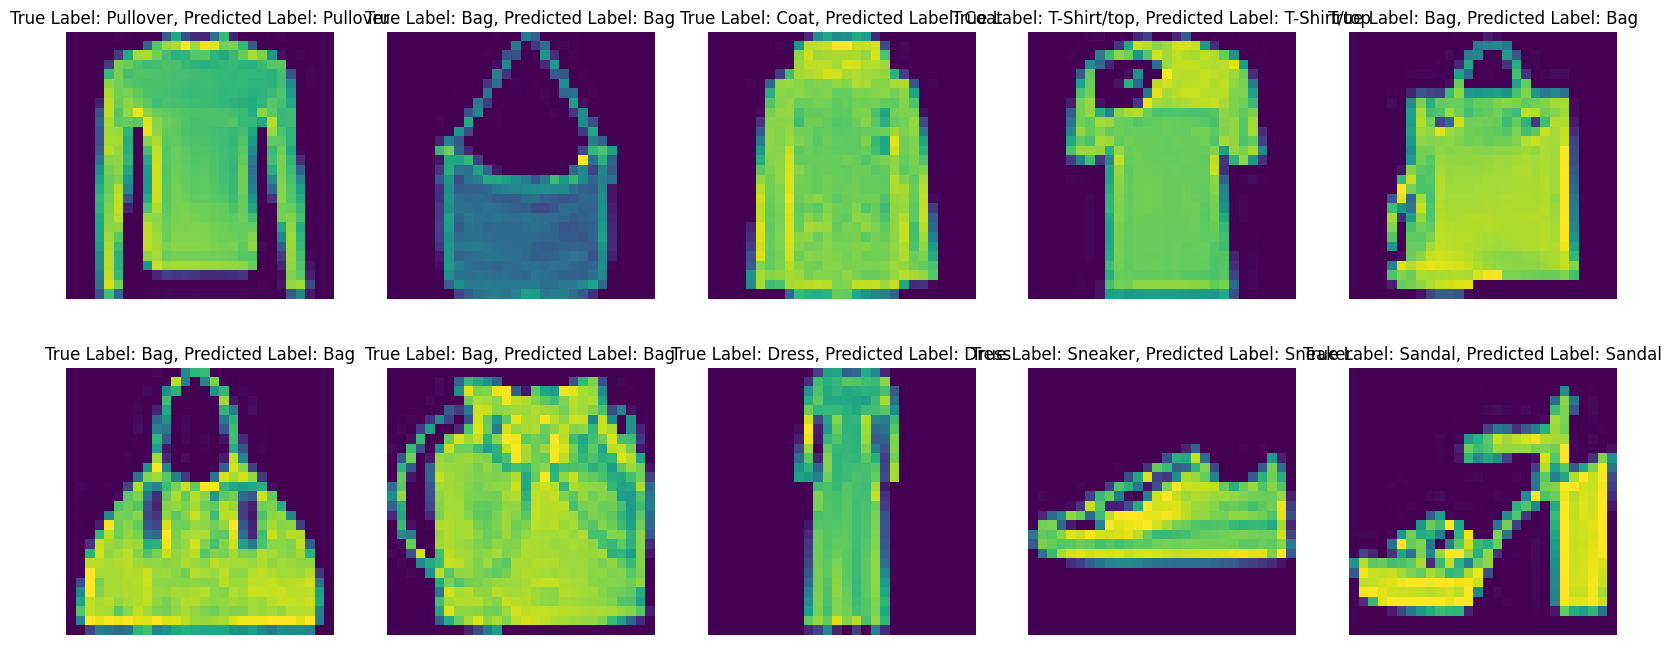

In [27]:
trainX, trainY_cat, testX, testY_cat = load_and_preprocess_data()
class_names=['T-Shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
model = create_cnn_model()
history = train_model(model, trainX, trainY_cat, testX, testY_cat, epochs=10)
visualize_random_predictions(model, testX, testY_cat, class_names)

In [17]:
class_names

['T-Shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']